In [25]:
N = 1
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [27]:
DATA_PATH = '../datasets/teen_phone_addiction_dataset.csv'
dataset = pd.read_csv(DATA_PATH)
data = dataset[col]

In [28]:
dataset.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

In [30]:
mean = np.mean(data)
var = np.var(data)
mode = stats.mode(data)[0]
median = np.median(data)
quantiles = np.quantile(data, [0.25, 0.5, 0.75])
kutorsis = stats.kurtosis(data)
skewness = stats.skew(data)
iqr = stats.iqr(data)

In [31]:
print(f'Среднее: {mean:.6f}')
print(f'Дисперсия: {var:.6f}')   
print(f'Мода: {mode}')
print(f'Медиана: {median}')
print(f"Квантили уровня 0.25, 0.5, 0.75: {', '.join(map(str, quantiles))}")
print(f'Эксцесс: {kutorsis:.6f}')
print(f'Ассиметрия: {skewness:.6f}')
print(f'Интерквартильный размах: {iqr}')

Среднее: 6.489767
Дисперсия: 2.221485
Мода: 6.1
Медиана: 6.5
Квантили уровня 0.25, 0.5, 0.75: 5.5, 6.5, 7.5
Эксцесс: -0.296949
Ассиметрия: 0.011848
Интерквартильный размах: 2.0


>Среднее и медиана почти совпадают – это говорит о том, что распределение близко к симметричному; к тому же ассиметрия почти нулевая. 
Отрицательное значение эксцесса означает, что распределение более плоское в сравнении с нормальным

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

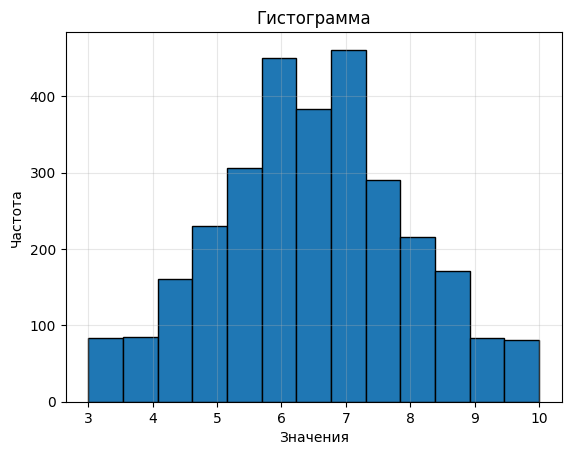

In [ ]:
plt.hist(data, bins='sturges', edgecolor='black')
plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

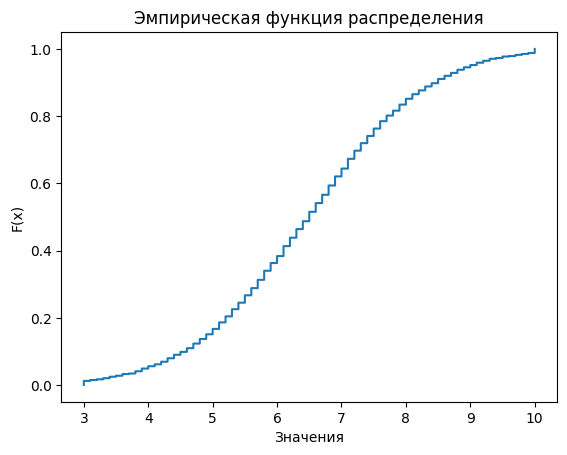

In [35]:
x = np.sort(data)
y = np.arange(1, len(x) + 1) / len(x)

plt.step(x, y, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()

>Исходя из вида гистограммы заключаем, что распределение данных бимодальное.

Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

In [ ]:
def chi_squared_test(data, alpha=0.05):
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    k = 1 + int(np.log2(len(data)))
    bins = np.linspace(min(data), max(data), k + 1)

    observed_freq, bin_edges = np.histogram(data, bins=bins)

    cdf = stats.norm.cdf(bin_edges, mean, std)
    expected_freq = len(data) * np.diff(cdf)

    chi2 = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    df = k - 1 - 2
    print(df)

    crit_val = stats.chi2.ppf(1 - alpha, df)
    return chi2 < crit_val

In [54]:
chi2_result = chi_squared_test(data)
chi2_result

np.False_

In [ ]:
_, p_value = stats.normaltest(data)
alpha = 0.05
p_value < alpha

np.True_

>Таким образом, по результатам обоих тестов отвергаем нулевую гипотезу (о том, что данные пришли из нормального распределения)

Построить Q-Q plot

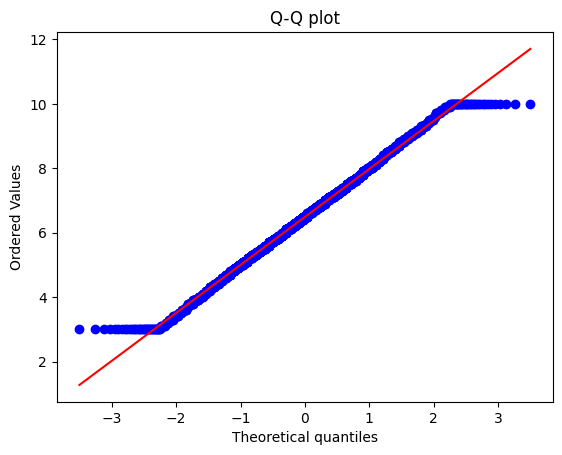

In [40]:
stats.probplot(data, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

>Если бы данные были нормально распределены, точки лежали бы вдоль красной линии. На графике видно, что на хвостах имеем отклонения: хвосты более лёгкие. Это ещё согласуется с тем, что значение эксцесса отрицательно

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

>Можно использовать IQR-метод. Однако, как видно ниже, выбросов в выборке нет

In [66]:
q1, q3 = np.percentile(data, [25, 75])
lower, upper = q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)
print(lower, upper)
print(min(data), max(data))

2.5 10.5
3.0 10.0


> Используем Box-Cox трансформацию, где параметр λ подбирается автоматически для максимальной близости к нормальному распределению:
$$x_{boxcox} = \frac{x^\lambda - 1}{\lambda}, \quad \lambda \neq 0$$

In [74]:
data_boxcox, _ = stats.boxcox(data)


Выполните пункты I и II для обработанных данных

In [75]:
mean = np.mean(data_boxcox)
var = np.var(data_boxcox)
mode = stats.mode(data_boxcox)[0]
median = np.median(data_boxcox)
quantiles = np.quantile(data_boxcox, [0.25, 0.5, 0.75])
kutorsis = stats.kurtosis(data_boxcox)
skewness = stats.skew(data_boxcox)
iqr = stats.iqr(data_boxcox)

In [77]:
print(f'Среднее: {mean:.6f}')
print(f'Дисперсия: {var:.6f}')   
print(f'Мода: {mode:.6f}')
print(f'Медиана: {median:.6f}')
print(f"Квантили уровня 0.25, 0.5, 0.75: {', '.join(map(str, quantiles))}")
print(f'Эксцесс: {kutorsis:.6f}')
print(f'Ассиметрия: {skewness:.6f}')
print(f'Интерквартильный размах: {iqr:.6f}')

Среднее: 5.106547
Дисперсия: 1.789592
Мода: 4.765860
Медиана: 5.124954
Квантили уровня 0.25, 0.5, 0.75: 4.224592503521355, 5.124953813160993, 6.017198899418903
Эксцесс: -0.289219
Ассиметрия: -0.024145
Интерквартильный размах: 1.792606


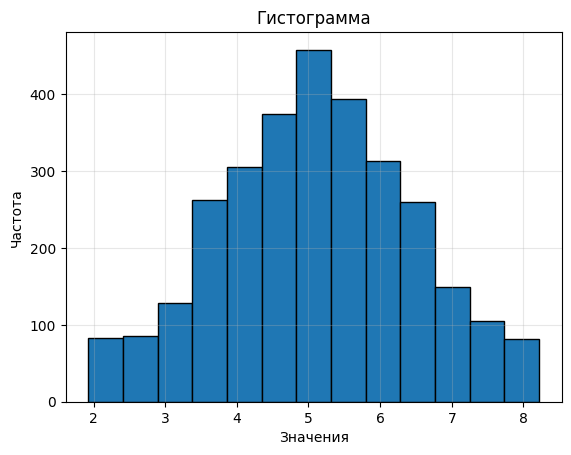

In [78]:
plt.hist(data_boxcox, bins='sturges', edgecolor='black')
plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

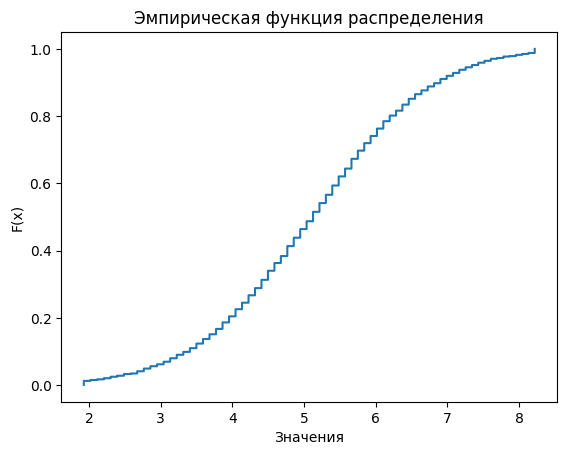

In [80]:
x = np.sort(data_boxcox)
y = np.arange(1, len(x) + 1) / len(x)

plt.step(x, y, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()

In [81]:
chi2_result = chi_squared_test(data)
chi2_result

np.False_

In [82]:
_, p_value = stats.normaltest(data)
alpha = 0.05
p_value < alpha

np.True_

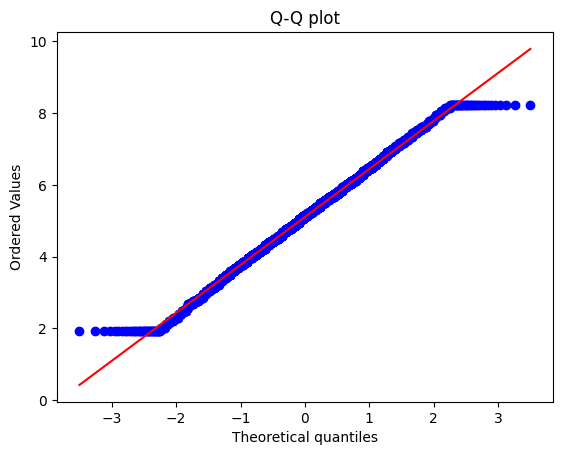

In [73]:
stats.probplot(data_boxcox, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

>Привести данные к нормальному распределению не вышло. Тем не менее, распределение теперь унимодально

Сгруппируйте данные по столбцу 'School_Grade'. 
1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

In [85]:
groups = dataset.groupby('School_Grade')

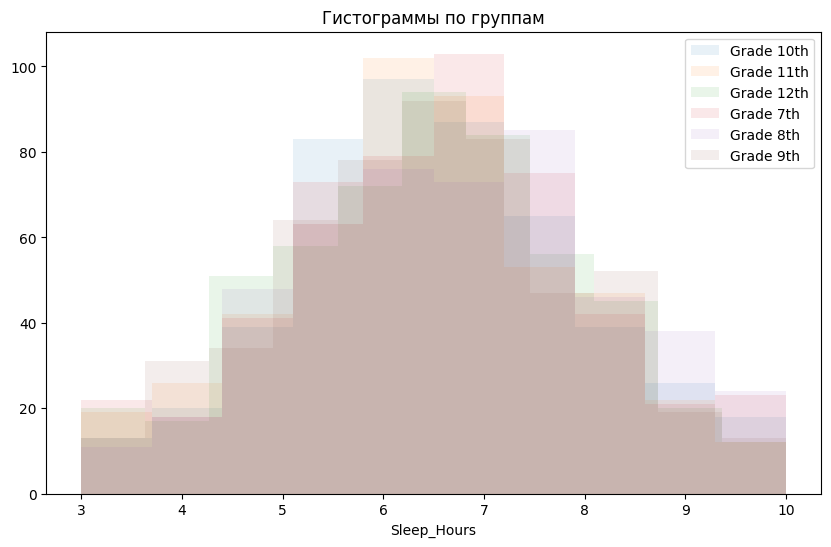

In [88]:
plt.figure(figsize=(10,6))

for grade, group in groups:
    plt.hist(group[col], bins='sturges', alpha=0.1, label=f'Grade {grade}')

plt.xlabel(col)
plt.title('Гистограммы по группам')
plt.legend()
plt.show()

In [89]:
stats_by_group = groups[col].agg(['mean', 'var'])
stats_by_group

,mean,var
School_Grade,,
10th,6.488296,2.102064
11th,6.367432,2.113079
12th,6.459735,2.201804
7th,6.483702,2.287617
8th,6.675311,2.406853
9th,6.468441,2.196945


>Разброс значений внутри групп отличается, 7-й и 8-й классы имеют более широкий диапазон, а 10-й и 11-й – более концентрированные значения